# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# from jupyterthemes import jtplot
# jtplot.style()

In [5]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [87]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)
    print(metrics.accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test)))

0.9916666666666667
0.9888888888888889
0.9888888888888889
0.9833333333333333
0.9916666666666667
0.9833333333333333
0.9944444444444445
0.9583333333333334
0.9805555555555555
0.9888888888888889
0.9861111111111112
0.9916666666666667
0.9916666666666667
0.9861111111111112
0.9944444444444445
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9972222222222222
0.9888888888888889


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

In [11]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(KNeighborsClassifier(), X, y, cv=3))

[0.98039216 0.98039216 1.        ]


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

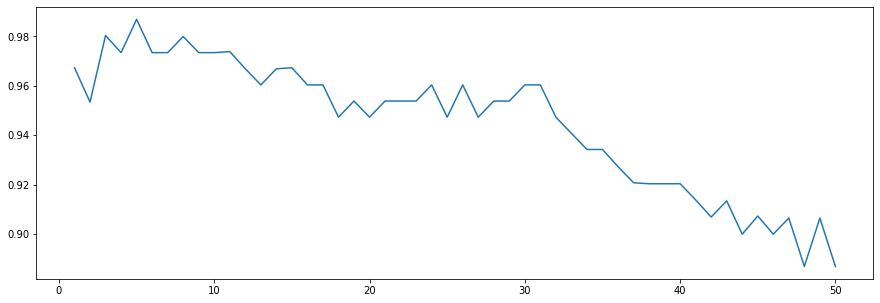

In [24]:
import matplotlib.pyplot as plt
from pylab import rcParams 
rcParams['figure.figsize'] = 15, 5 

m = []
n = []

for i in range(50):
    m.append(i+1)
    n.append(cross_val_score(KNeighborsClassifier(n_neighbors = i+1), X, y, cv=3).mean())
    
plt.plot(m,n)

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [27]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [41]:
# instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [30]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0009152412414550782
std_fit_time : 0.00026631013343821975
mean_score_time : 0.003071451187133789
std_score_time : 0.0007369876801634946
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 24


In [32]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

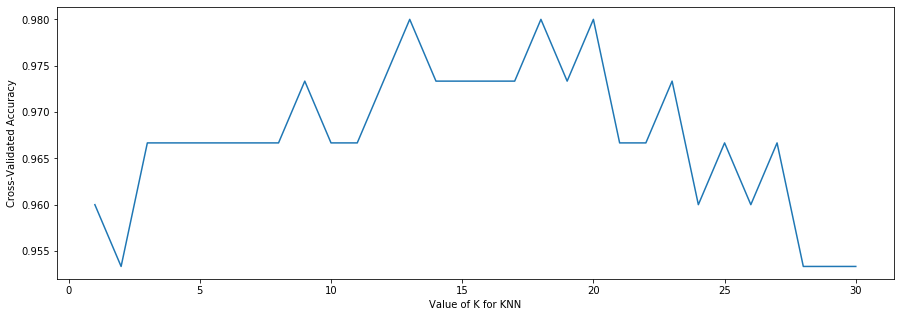

In [33]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [34]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

In [36]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train).predict(X_test)
confusion_matrix(y_true, y_pred)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 13]])

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [39]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [74]:
%%time

param_grid = {"n_neighbors": list(range(1,30)),
              "weights": ['uniform', 'distance']}

clf = RandomizedSearchCV(knn, param_grid, random_state=0)
search = clf.fit(X_train, y_train)
print(search.best_params_, search.best_score_)
print('')
print(search.best_estimator_)

{'weights': 'distance', 'n_neighbors': 14} 0.9833333333333333

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')
CPU times: user 132 ms, sys: 6.92 ms, total: 139 ms
Wall time: 150 ms


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [53]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9583333333333334
0.9666666666666667


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [55]:
from sklearn.datasets import load_digits

In [56]:
data = load_digits()

In [57]:
X, y = data['data'], data['target']

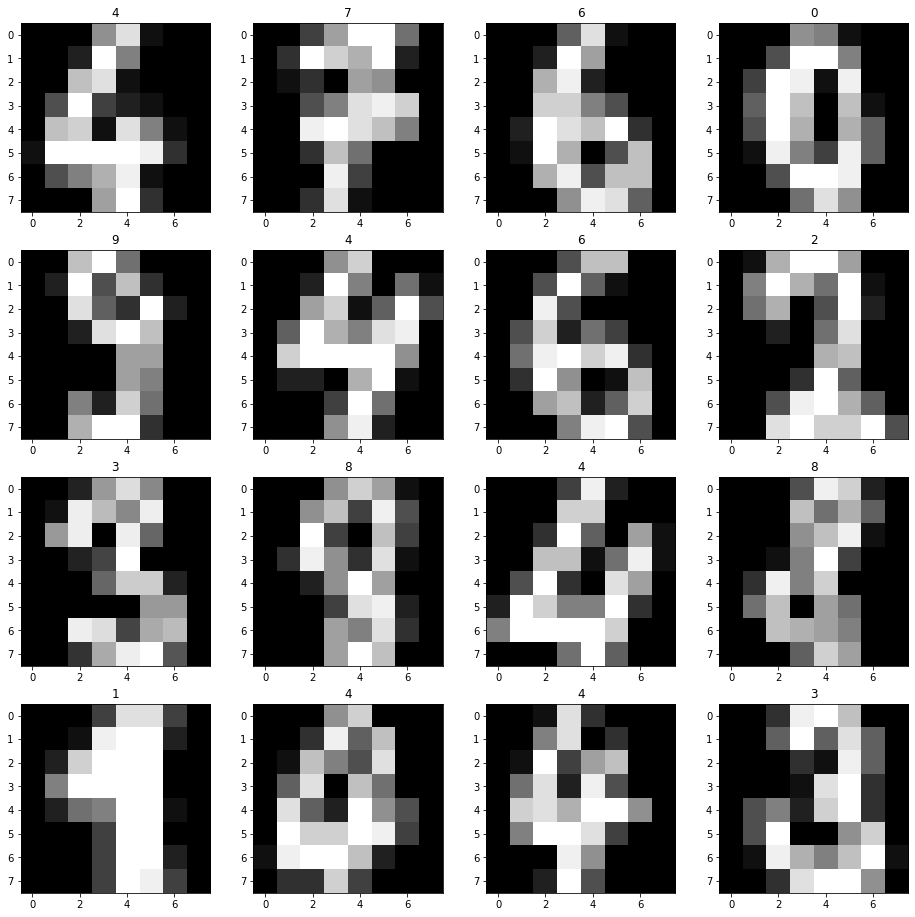

In [59]:
import numpy as np

fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

In [90]:
%%time

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier()
lr = LogisticRegression()

rfp = {"n_estimators": list(range(1,30)),
       "max_depth": list(range(1,30))}

lrp = {'max_iter': list(range(1,100)),
       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


clfrf = RandomizedSearchCV(rf, rfp, random_state=0)
clflr = RandomizedSearchCV(lr, lrp, random_state=0)
search = clfrf.fit(X_train, y_train)
print('RandomForestClassifier', search.best_params_, search.best_score_)
search = clflr.fit(X_train, y_train)
print('LogisticRegression', search.best_params_, search.best_score_)

RandomForestClassifier {'n_estimators': 25, 'max_depth': 23} 0.965205288796103
LogisticRegression {'solver': 'sag', 'max_iter': 57} 0.9589422407794015
CPU times: user 14.9 s, sys: 146 ms, total: 15.1 s
Wall time: 10.3 s


# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)